# Milestone 1

---

Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Full Time Program khususnya pada Artificial Neural Network.

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

### Dataset

Pada project ini dataset yang digunakan data customer dari sebuah perusahaan telephone. Dataset ini berisi 7043 baris dengan 21 kolom yang diantaranya adalah customerID, gender, seniorCitizen, partner, dependents, dan masih banyak lagi. Dataset dapat dilihat di [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn).

Keterangan dari kolom dataset adalah:

| Feature          | Description                                                                                                        |
| ---------------- | ------------------------------------------------------------------------------------------------------------------ |
| customerID       | Customer ID                                                                                                        |
| gender           | Whether the customer is a male or a female                                                                         |
| SeniorCitizen    | Whether the customer is a senior citizen or not (1, 0)                                                             |
| Partner          | Whether the customer has a partner or not (Yes, No)                                                                |
| Dependents       | Whether the customer has dependents or not (Yes, No)                                                               |
| tenure           | Number of months the customer has stayed with the company                                                          |
| PhoneService     | Whether the customer has a phone service or not (Yes, No)                                                          |
| MultipleLines    | Whether the customer has multiple lines or not (Yes, No, No phone service)                                         |
| InternetService  | Customer’s internet service provider (DSL, Fiber optic, No)                                                        |
| OnlineSecurity   | Whether the customer has online security or not (Yes, No, No internet service)                                     |
| OnlineBackup     | Whether the customer has online backup or not (Yes, No, No internet service)                                       |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service)                                   |
| TechSupport      | Whether the customer has tech support or not (Yes, No, No internet service)                                        |
| StreamingTV      | Whether the customer has streaming TV or not (Yes, No, No internet service)                                        |
| StreamingMovies  | Whether the customer has streaming movies or not (Yes, No, No internet service)                                    |
| Contract         | The contract term of the customer (Month-to-month, One year, Two year)                                             |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No)                                                        |
| PaymentMethod    | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges   | The amount charged to the customer monthly                                                                         |
| TotalCharges     | The total amount charged to the customer                                                                           |
| Churn            | Whether the customer churned or not (Yes or No)                                                                    |

### Objectives

**Milestones 1** ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.

## Import Libraries

Pada project ini library yang digunakan adalah **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, **Scikit-Learn**, **TensorFlow**, **Keras**, dan **Pickle**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
import pickle

Melakukan setting agar pandas menampilkan seluruh kolom pada dataframe.

In [2]:
pd.set_option('display.max_columns', None)

## Data Loading

Membuat dataframe bernama `customer` dari file `WA_Fn-UseC_-Telco-Customer-Churn.csv`.

In [3]:
customer = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Characteristics

In [5]:
customer.shape

(7043, 21)

Dataset ini berisi **7043 baris** dan **21 kolom**.

In [6]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dari basic info diatas dapat diketahui bahwa dataset ini **tidak memiliki missing value** namun akan dilihat lebih lanjut pada bagian **data cleaning** dan dataset ini terdiri dari:
- 1 kolom bertipe data **float**
- 2 kolom bertipe data **integer**
- 18 kolom bertipe data **object** 

Namun, kolom `TotalCharges` ini memiliki tipe data **object** yang sebenernya kolom ini berupa value numeric (**float**) maka akan dilakukan pengubahan tipe data pada bagian data cleaning.

In [7]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Jika dilihat dari summary statistics di atas kolom `tenure` dan `MonthlyCharges` memiliki distribusi yang **Skewed** karena nilai mean dan mediannya tidak sama.

## Data Cleaning

### Change Data Type

Pada bagian ini akan dilakukan pengubahan tipe data pada kolom `TotalCharges` dan `SeniorCitizen`.

In [8]:
customer['TotalCharges'] = customer.TotalCharges.replace(' ', np.nan) # replace empty space with NaN

In [9]:
customer['TotalCharges'] = customer.TotalCharges.astype(float) # convert to float

In [10]:
customer['SeniorCitizen'] = customer.SeniorCitizen.map({1: 'Yes', 0: 'No'}) # convert to string

### Missing Value

Pada bagian ini akan dilakukan pencekan terhadap missing value pada dataset.

In [11]:
customer.isna().mean()

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

Karena persentase missing value ini sangat kecil, maka missing value ini akan di drop dari dataframe.

In [12]:
customer = customer.dropna()

In [13]:
customer.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Duplicated Data

Pada bagian ini akan dilakukan pengecekan apakah terdapat duplicated data pada dataset.

In [14]:
customer.duplicated().sum()

0

Dari hasil pengecekan, **tidak terdapat duplicated data** pada dataset.

### Column Drop

Pada bagian ini akan menghapus kolom `customerID` karena diasumsikan bahwa kolom ini tidak akan menjadi feature.

In [15]:
customer = customer.drop(columns=['customerID'])

In [16]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


## Exploratory Data Analysis (EDA)

### Churn

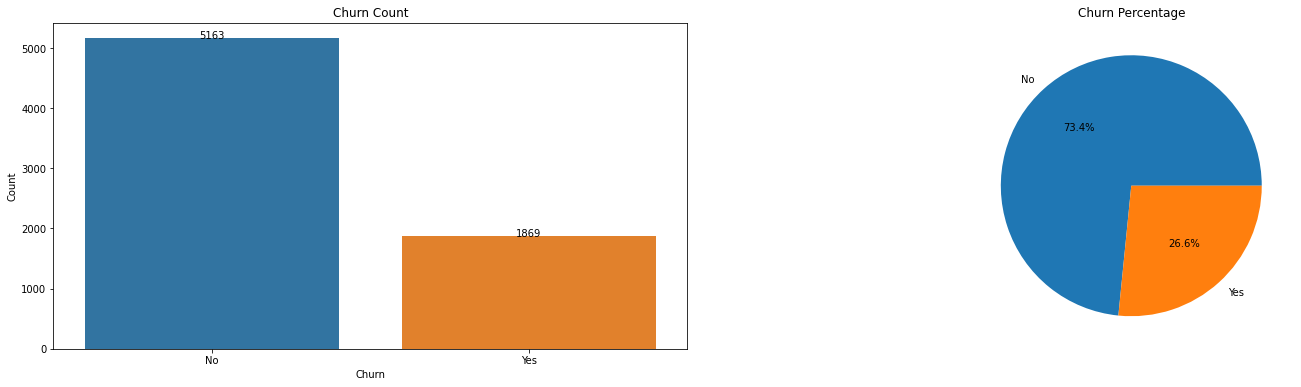

In [17]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='Churn', data=customer)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(customer.Churn.value_counts(), labels=customer.Churn.value_counts().index, autopct='%1.1f%%')
plt.title('Churn Percentage')
plt.show()

Ada sekitar **1869 customer** atau sekitar **27%** dari customer yang churn atau meninggalkan perusahaan.

### Gender

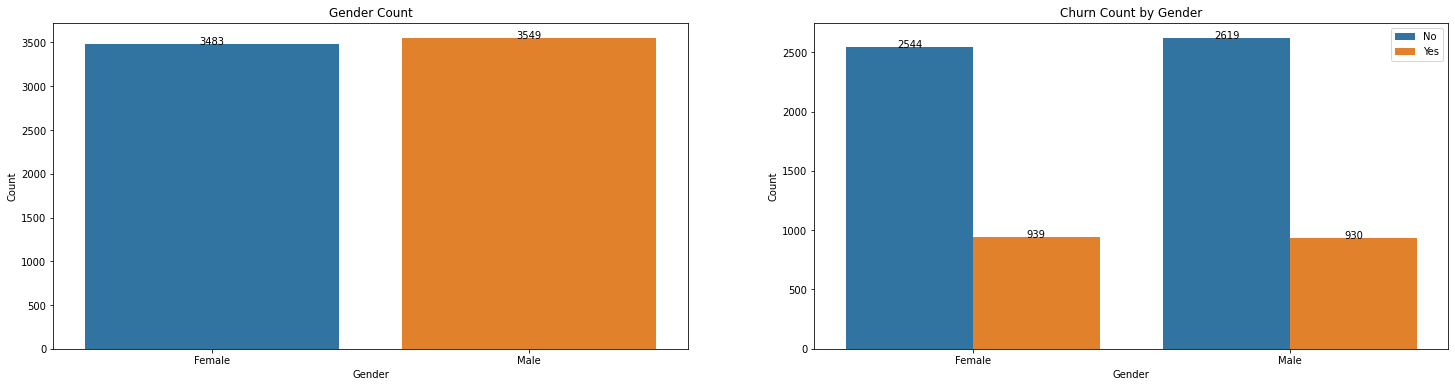

In [18]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='gender', data=customer)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
fig = sns.countplot(x='gender', data=customer, hue='Churn')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Churn Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()
plt.show()

Jumlah dari customer pria ataupun wanita tidak memiliki perbedaan yang signifikan, dan jika dilihat sepertinya `gender` ini tidak mempengaruhi `Churn` karena dari bar plot jumlah customer pria dan wanita yang churn ini hampir sama.

### Senior Citizen

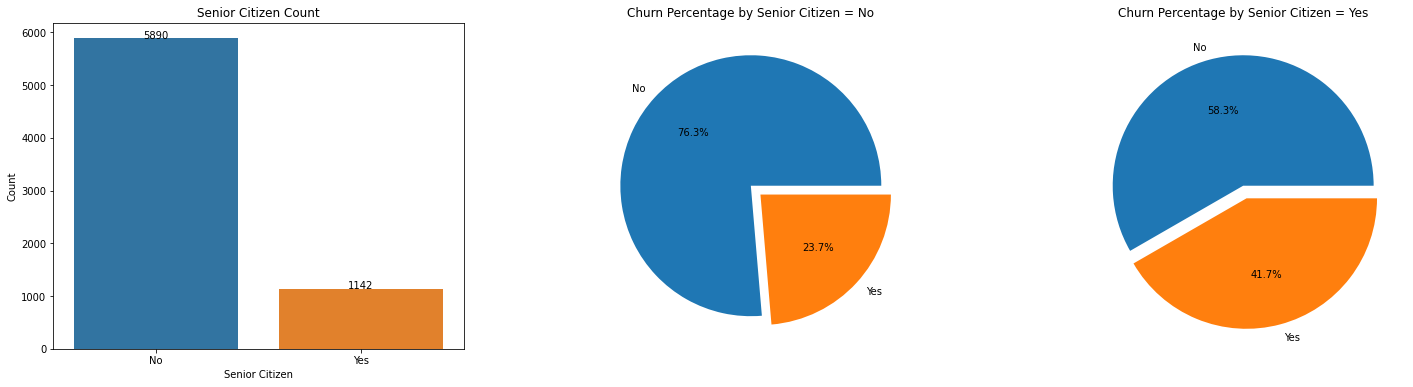

In [19]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='SeniorCitizen', data=customer)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Senior Citizen Count')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.pie(customer[customer.SeniorCitizen == 'No'].Churn.value_counts(), labels=customer[customer.SeniorCitizen == 'No'].Churn.value_counts().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Senior Citizen = No')
plt.subplot(1, 3, 3)
plt.pie(customer[customer.SeniorCitizen == 'Yes'].Churn.value_counts(), labels=customer[customer.SeniorCitizen == 'Yes'].Churn.value_counts().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Senior Citizen = Yes')
plt.show()

Ada sekitar 1142 customer yang merupakan customer lanjut usia dan jika dilihat dari persentasenya dapat diketahui bahwa customer lanjut usia ini lebih cenderung churn dibandingkan customer yang bukan lanjut usia.

### Partner

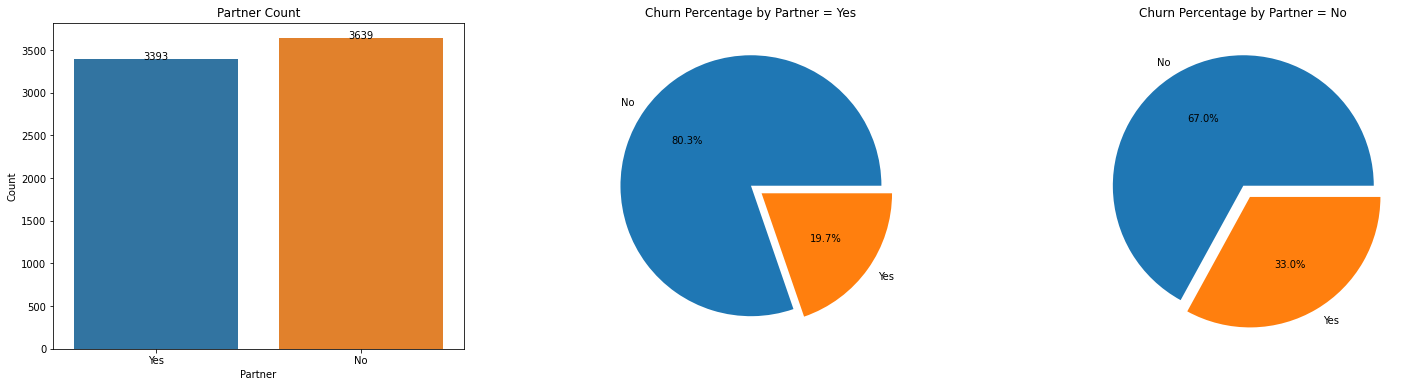

In [20]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='Partner', data=customer)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Partner Count')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.pie(customer[customer.Partner == 'Yes'].Churn.value_counts(), labels=customer[customer.Partner == 'Yes'].Churn.value_counts().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Partner = Yes')
plt.subplot(1, 3, 3)
plt.pie(customer[customer.Partner == 'No'].Churn.value_counts(), labels=customer[customer.Partner == 'No'].Churn.value_counts().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Partner = No')
plt.show()

Ada **3393 customer** yang memiliki pasangan dan ada **3639 customer** yang tidak memiliki pasangan. Namun jika dilihat dari persentasenya, klien yang tidak memiliki pasangan cenderung lebih untuk churn ketimbang klien yang memiliki pasangan.

### Dependents

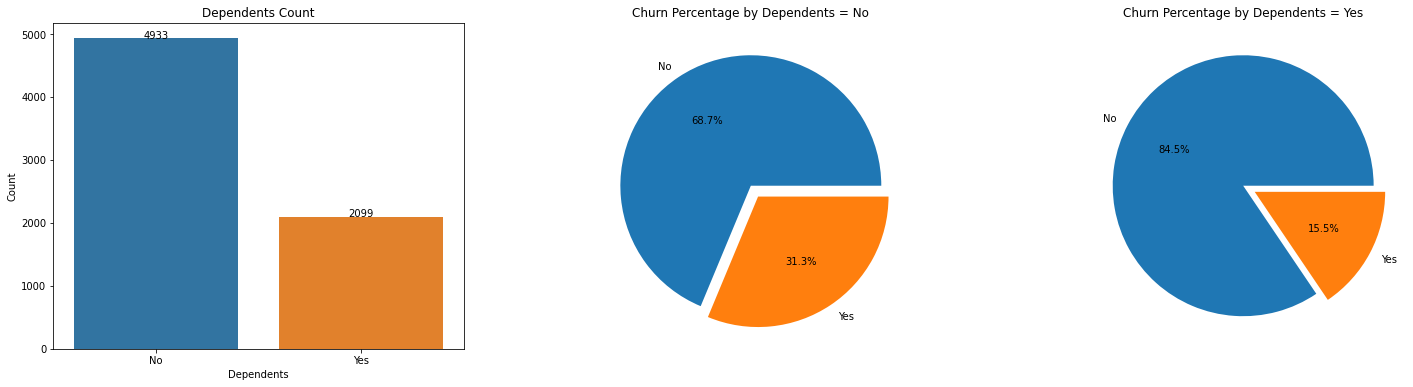

In [21]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='Dependents', data=customer)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Dependents Count')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.pie(customer[customer.Dependents == 'No'].Churn.value_counts(), labels=customer[customer.Dependents == 'No'].Churn.value_counts().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Dependents = No')
plt.subplot(1, 3, 3)
plt.pie(customer[customer.Dependents == 'Yes'].Churn.value_counts(), labels=customer[customer.Dependents == 'Yes'].Churn.value_counts().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Dependents = Yes')
plt.show()

Ada sekitar **2099 customer** yang tidak memiliki tanggungan dan sama seperti kolom `Partner`, customer yang tidak memiliki tanggungan ini lebih cenderung untuk churn ketimbang customer yang memiliki tanggungan.

### Tenure

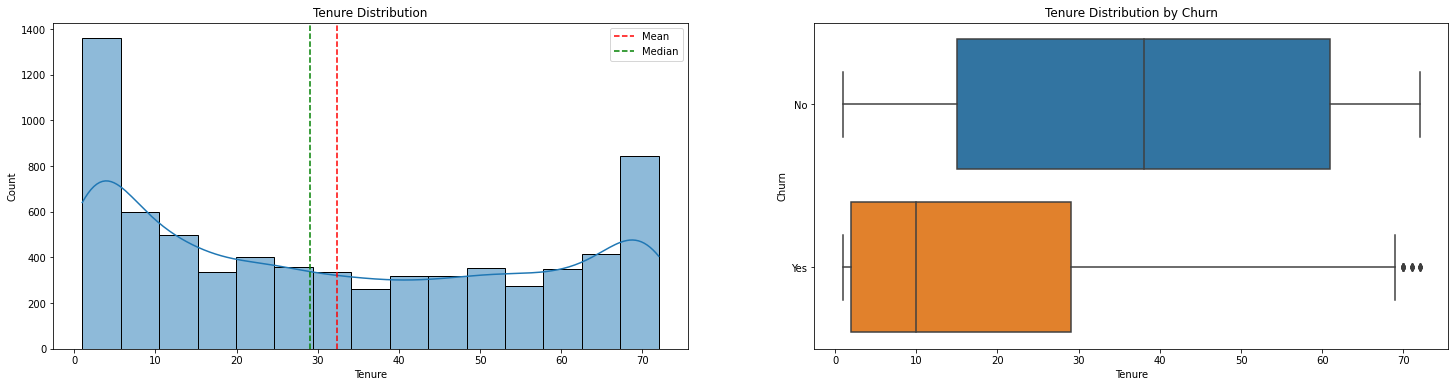

Skewness: 0.23773083190513133
Mean: 32
Median: 29.0
Min: 1
Max: 72


In [22]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='tenure', data=customer, kde=True)
plt.axvline(customer.tenure.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(customer.tenure.median(), color='g', linestyle='--', label='Median')
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='tenure', y='Churn', data=customer)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.show()
print(f'Skewness: {customer.tenure.skew()}')
print(f'Mean: {customer.tenure.mean():.0f}')
print(f'Median: {customer.tenure.median()}')
print(f'Min: {customer.tenure.min()}')
print(f'Max: {customer.tenure.max()}')

`Tenure` ini adalah berapa lama customer tinggal di perusahaan ini, rata-rata customer memiliki tenure selama **32 bulan** dengan tenure paling cepat adalah **1 bulan** dan yang paling lama adalah **72 bulan**. Dan jika dilihat dari boxplot customer yang tidak churn adalah customer yang sudah lama tinggal di perusahaan sedangkan customer yang churn adalah customer yang baru, namun ada juga customer lama yang akhirnya churn.

### Phone Service and Multiple Lines

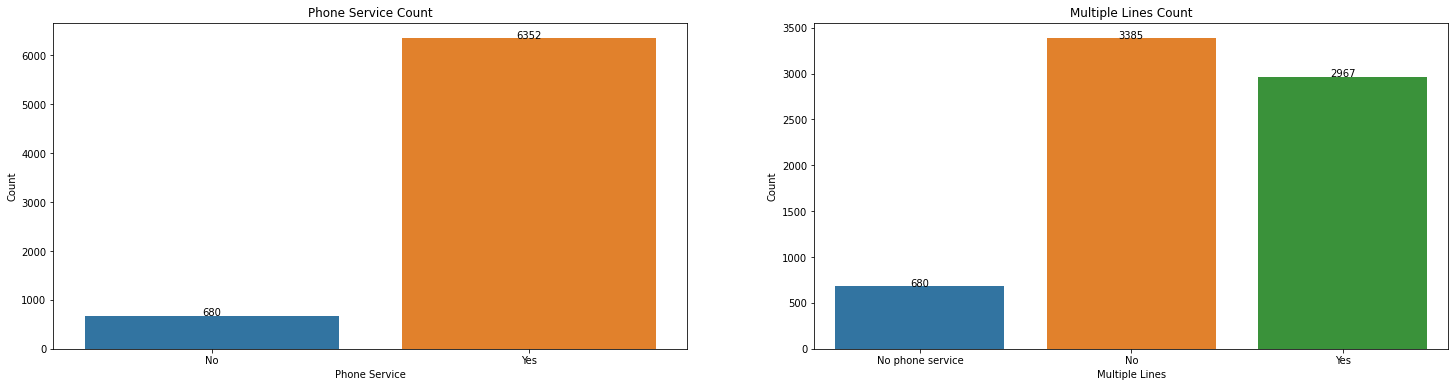

In [23]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='PhoneService', data=customer)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Phone Service Count')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
fig = sns.countplot(x='MultipleLines', data=customer)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Multiple Lines Count')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')
plt.show()

Kebanyakan dari customer ini memiliki layanan telephone dan hanya ada **680 customer** saya yang tidak memiliki layanan telephone ini dan dari **6352 customer** yang memiliki layanan telephone hanya ada **2967 customer** saja yang memiliki layanan telephone lebih dari 1.

In [24]:
customer[customer.PhoneService == 'No'][['PhoneService', 'MultipleLines']].head()

,PhoneService,MultipleLines
0,No,No phone service
3,No,No phone service
7,No,No phone service
20,No,No phone service
27,No,No phone service


Jika seorang customer ini tidak menggunakan layanan telephone maka pada kolom `MultipleLines` dari customer ini akan berisi nilai **No phone service**.

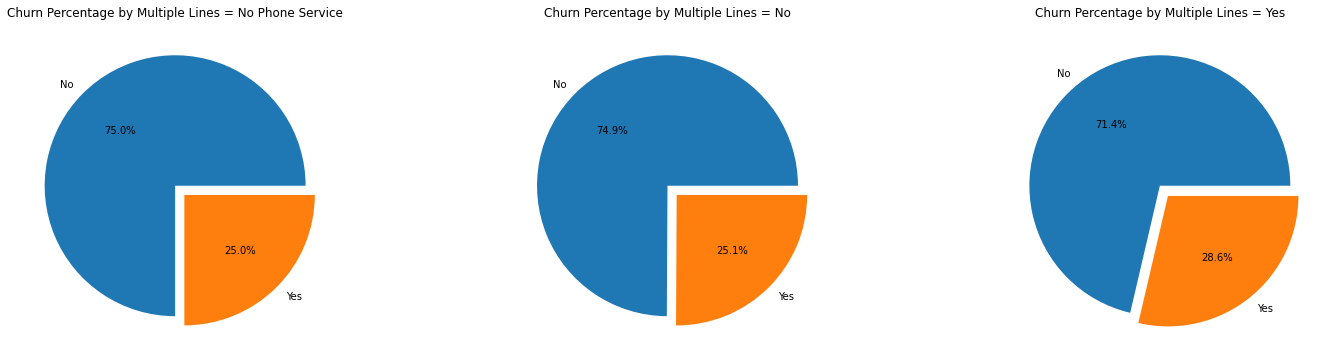

In [25]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
plt.pie(customer[customer.MultipleLines == 'No phone service'].Churn.value_counts(), labels=customer[customer.MultipleLines == 'No phone service'].Churn.value_counts().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Multiple Lines = No Phone Service')
plt.subplot(1, 3, 2)
plt.pie(customer[customer.MultipleLines == 'No'].Churn.value_counts(), labels=customer[customer.MultipleLines == 'No'].Churn.value_counts().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Multiple Lines = No')
plt.subplot(1, 3, 3)
plt.pie(customer[customer.MultipleLines == 'Yes'].Churn.value_counts(), labels=customer[customer.MultipleLines == 'Yes'].Churn.value_counts().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Multiple Lines = Yes')
plt.show()

Namun jika dilihat dari pesentase diatas, sepertinya layanan telephone ini tidak memiliki perbedaan yang signifikan antara customer yang tidak memiliki layanan telephone dengan yang memiliki layanan telephone.

### Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, and Streaming Movies

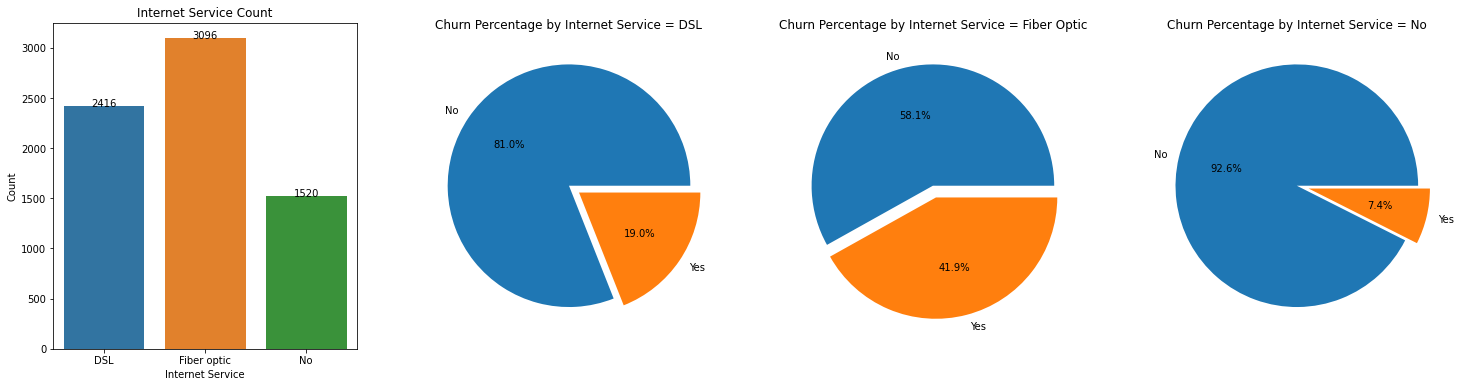

In [26]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 4, 1)
fig = sns.countplot(x='InternetService', data=customer)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Internet Service Count')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.subplot(1, 4, 2)
plt.pie(customer[customer.InternetService == 'DSL'].Churn.value_counts(), labels=customer[customer.InternetService == 'DSL'].Churn.value_counts().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Internet Service = DSL')
plt.subplot(1, 4, 3)
plt.pie(customer[customer.InternetService == 'Fiber optic'].Churn.value_counts(), labels=customer[customer.InternetService == 'Fiber optic'].Churn.value_counts().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Internet Service = Fiber Optic')
plt.subplot(1, 4, 4)
plt.pie(customer[customer.InternetService == 'No'].Churn.value_counts(), labels=customer[customer.InternetService == 'No'].Churn.value_counts().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Internet Service = No')
plt.show()

Kebanyakan dari customer ini menggunakan layanan internet **fiber optic** dengan jumlah **3096 customer** lalu ada **2416 customer** dengan layanan internet DSL dan ada juga customer yang tidak menggunakan layanan internet yaitu sebanyak **1520 customer**. Namun, customer yang tidak menggunakan layanan internet ini memiliki persentase churn paling rendah yaitu hanya sekitar **7%** saja dan customer yang menggunakan fiber optic memiliki persentase churn paling tinggi yaitu sekitar **42%**. Mungkin ini disebabkan banyaknya iklan digital yang bertebaran di internet yang membuat customer pindah ke perusahaan lain.

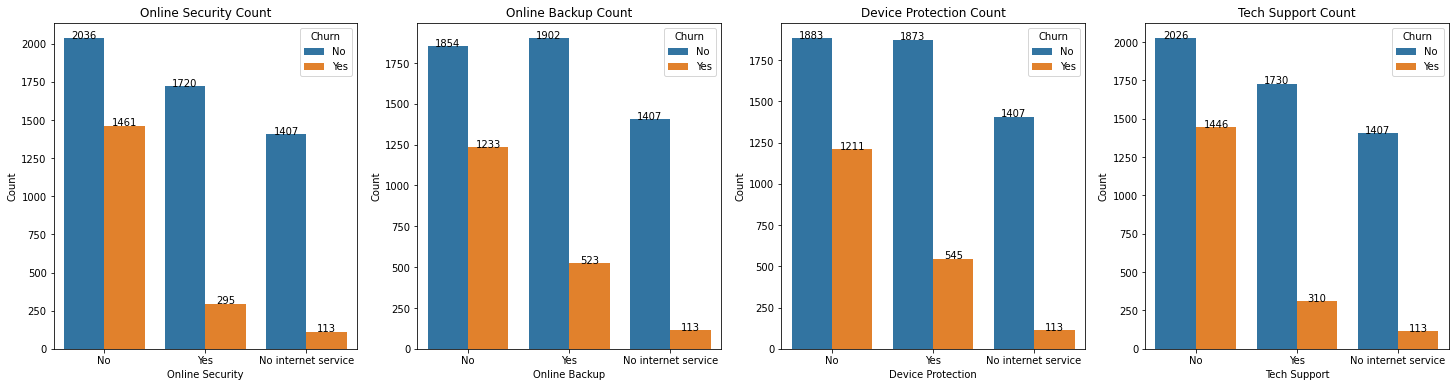

In [27]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 4, 1)
fig = sns.countplot(x='OnlineSecurity', data=customer, hue='Churn')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Online Security Count')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.subplot(1, 4, 2)
fig = sns.countplot(x='OnlineBackup', data=customer, hue='Churn', order=customer.OnlineBackup.value_counts().index)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Online Backup Count')
plt.xlabel('Online Backup')
plt.ylabel('Count')
plt.subplot(1, 4, 3)
fig = sns.countplot(x='DeviceProtection', data=customer, hue='Churn')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Device Protection Count')
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.subplot(1, 4, 4)
fig = sns.countplot(x='TechSupport', data=customer, hue='Churn')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Tech Support Count')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()

Dari bar plot diatas, dapat diketahui bahwa customer yang tidak berlangganan online security, online backup, device protection, dan tech support lebih **cenderung untuk churn** di bandingkan customer yang berlangganan.

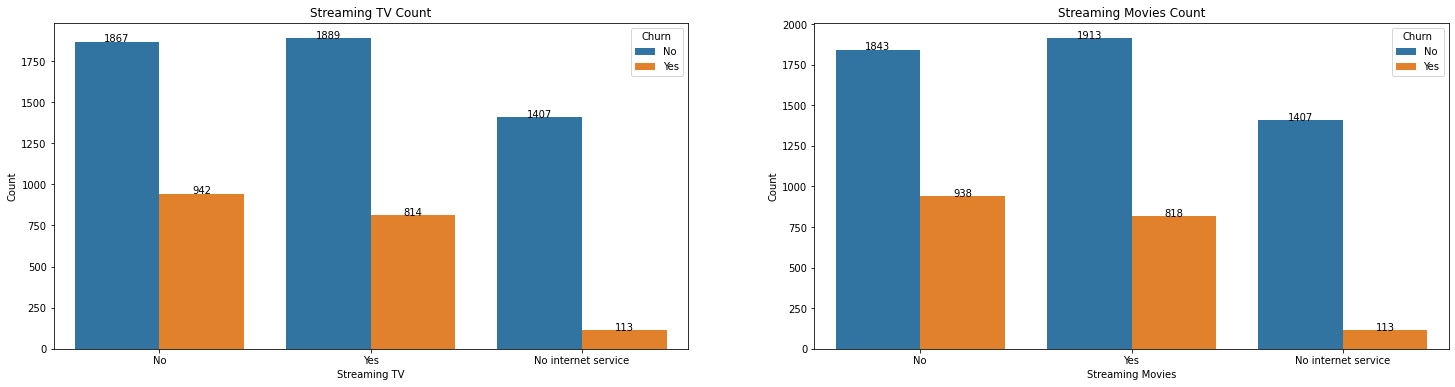

In [28]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='StreamingTV', data=customer, hue='Churn')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Streaming TV Count')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
fig = sns.countplot(x='StreamingMovies', data=customer, hue='Churn')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Streaming Movies Count')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')
plt.show()

Sedangkan untuk churn dari customer yang berlangganan ataupun tidak berlangganan streaming tv maupun streaming movies ini tidak ada perbedaan yang terlalu signifikan.

In [29]:
customer[customer.InternetService == 'No'][['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
11,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
16,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
21,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
22,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
33,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


Dari tabel diatas dapat diketahui jika seorang customer ini tidak menggunakan layanan internet maka customer ini juga dapat dipastikan tidak menggunakan layanan lain seperti Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, dan Streaming Movies.

### Contract, Paperless Billing, and Payment Method

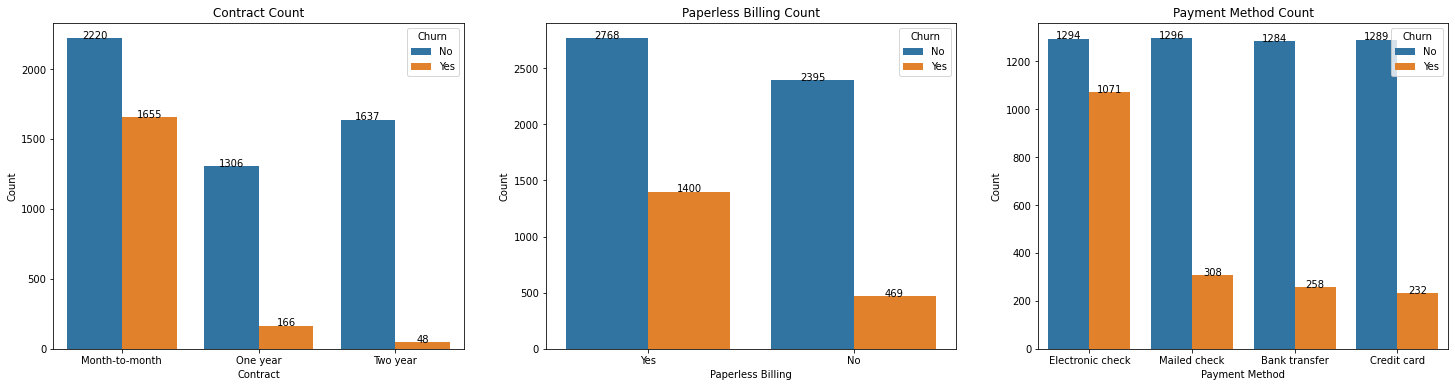

In [30]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='Contract', data=customer, hue='Churn')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Contract Count')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
fig = sns.countplot(x='PaperlessBilling', data=customer, hue='Churn')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Paperless Billing Count')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.subplot(1, 3, 3)
fig = sns.countplot(x='PaymentMethod', data=customer, hue='Churn')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Payment Method Count')
plt.xlabel('Payment Method')
fig.set_xticklabels(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'])
plt.ylabel('Count')
plt.show()

Kebanyakan dari customer yang churn adalah customer yang membayar layanannya per bulan untuk customer yang membayar layanan per tahun itu sangat kecil yang churn atau pindah layanan. Lalu, untuk customer yang menggunakan paperless billing hampir setengahnya churn dan untuk metode pembayaran dengan customer churn paling tinggi adalah customer yang menggunakan metode pembayaran **Electronic check** sedangkan untuk metode pembayaran lain tidak ada perbedaan yang signifikan.

### Monthly Charges and TotalCharges

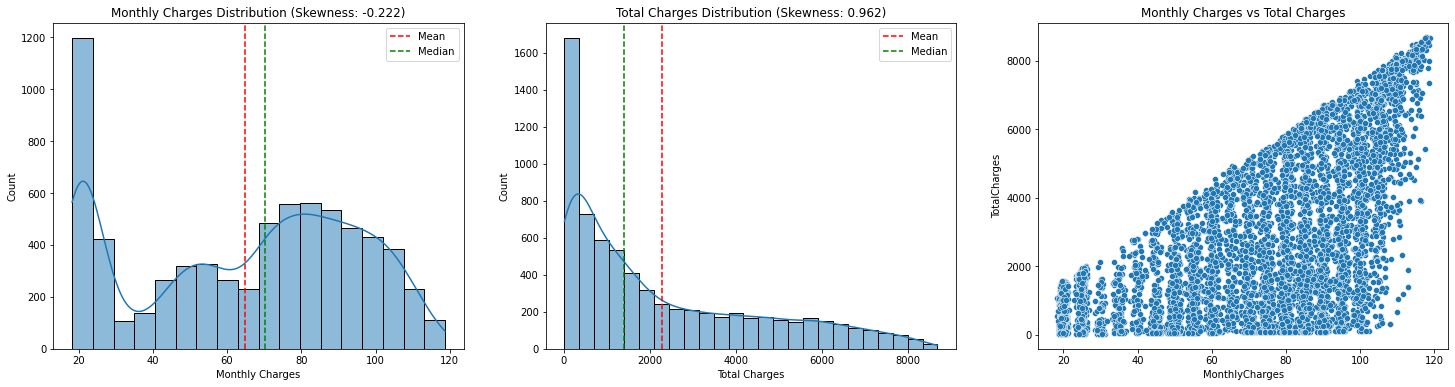

Monthly Charges Mean: 64.80
Total Charges Mean: 2283.30


In [31]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.histplot(x='MonthlyCharges', data=customer, kde=True)
plt.axvline(customer.MonthlyCharges.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(customer.MonthlyCharges.median(), color='g', linestyle='--', label='Median')
plt.title(f'Monthly Charges Distribution (Skewness: {customer.MonthlyCharges.skew():.3f})')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(x='TotalCharges', data=customer, kde=True)
plt.axvline(customer.TotalCharges.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(customer.TotalCharges.median(), color='g', linestyle='--', label='Median')
plt.title(f'Total Charges Distribution (Skewness: {customer.TotalCharges.skew():.3f})')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.legend()
plt.subplot(1, 3, 3)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=customer)
plt.title(f'Monthly Charges vs Total Charges')
plt.show()
print(f'Monthly Charges Mean: {customer.MonthlyCharges.mean():.2f}')
print(f'Total Charges Mean: {customer.TotalCharges.mean():.2f}')

Distribusi dari kolom `MonthlyCharges` ini masih cenderung normal karena memiliki nilai skewness diantara -0.5 dan 0.5 sedangkan untuk kolom `TotalCharges` memiliki distribusi yang Right-Skewed dengan nilai skewness 0.962. Rata-rata biaya bulanan dari customer adalah sekitar **$65** dan semakin tinggi biaya bulanan ini maka total biaya juga akan semakin tinggi, ini dapat dilihat dari scatter plot bahwa kolom `MonthlyCharges` memiliki korelasi yang positive terhadap kolom `TotalCharges`.

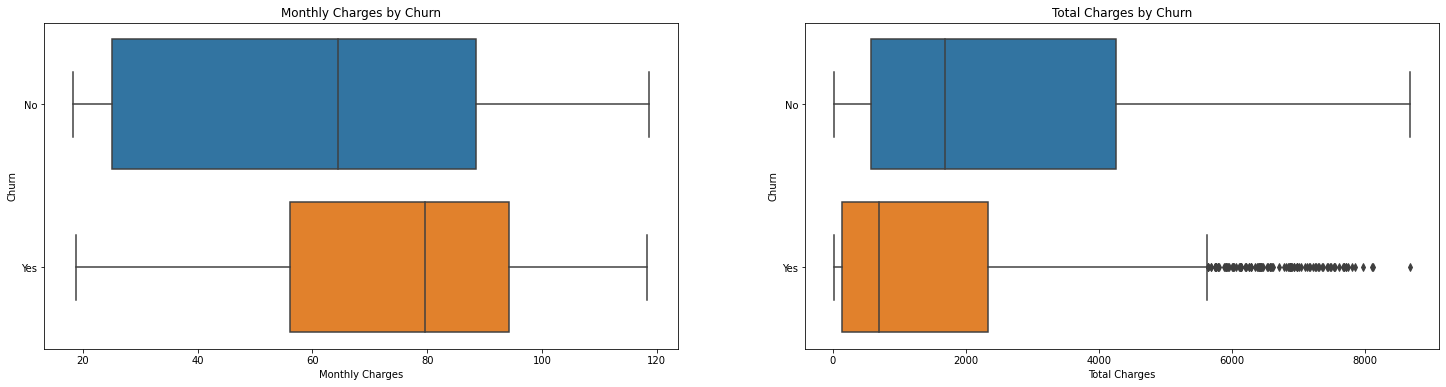

------------------------------------------------------
Monthly Charges for Non-Churn Customer: 61.31
Monthly Charges for Churn Customer: 74.44
------------------------------------------------------
Total Charges for Non-Churn Customer: 2555.34
Total Charges for Churn Customer: 1531.80


In [32]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='MonthlyCharges', y='Churn',data=customer)
plt.title(f'Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn')
plt.subplot(1, 2, 2)
sns.boxplot(x='TotalCharges', y='Churn',data=customer)
plt.title(f'Total Charges by Churn')
plt.xlabel('Total Charges')
plt.ylabel('Churn')
plt.show()
print('------------------------------------------------------')
print(f"Monthly Charges for Non-Churn Customer: {customer.MonthlyCharges[customer.Churn == 'No'].mean():.2f}")
print(f"Monthly Charges for Churn Customer: {customer.MonthlyCharges[customer.Churn == 'Yes'].mean():.2f}")
print('------------------------------------------------------')
print(f"Total Charges for Non-Churn Customer: {customer.TotalCharges[customer.Churn == 'No'].mean():.2f}")
print(f"Total Charges for Churn Customer: {customer.TotalCharges[customer.Churn == 'Yes'].mean():.2f}")

Dari boxplot `MonthlyCharges` dapat diketahui bahwa customer yang churn adalah customer dengan biaya bulanan yang tinggi dengan rata-rata biaya bulanan sebesar **$74**. Namun, jika dilihat dari boxplot `TotalCharges` customer yang tetep menggunakan layanan dari perusahaan ini memiliki total charges yang lebih tinggi dari customer yang churn dengan rata-rata total charges sebesar **$2,555**.

## Data Preprocessing

### Split Data

Pada bagian ini akan dilakukan pemisahan (**splitting**) data yang akan menjadi training set, validation set, dan testing set dengan perbandingan **7:2:1**, dimana:
- **70%** data menjadi **training set**
- **20%** data menjadi **validation set**
- **10%** data menjadi **testing set**

In [33]:
df_train_val, df_test = train_test_split(customer, test_size=0.1, random_state=23, stratify=customer.Churn)
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=23, stratify=df_train_val.Churn)

Mengubah tipe data pada kolom `Churn`, dimana:
- **Yes** akan menjadi **1**
- **No** akan mnejadi **0**

In [34]:
df_train['Churn'] = df_train['Churn'].map({'Yes': 1, 'No': 0})
df_val['Churn'] = df_val['Churn'].map({'Yes': 1, 'No': 0})
df_test['Churn'] = df_test['Churn'].map({'Yes': 1, 'No': 0})

### Feature Engineering

#### Feature Selection

Pada bagian ini akan dipisahkan antara kolom feature dan kolom targetnya.

In [35]:
# Training 
X_train = df_train.drop(['Churn'], axis=1) # Features
y_train = df_train['Churn'] # Target

# Validation
X_val = df_val.drop(['Churn'], axis=1) # Features
y_val = df_val['Churn'] # Target

#### Preprocessing Pipeline

Pada bagian ini akan dibuat pipeline untuk melakukan scaling dan encoding, dimana:
- **Scaling** menggunakan `StandardScaler()`
- **Encoding** menggunakan `OneHotEncoder()`

In [36]:
num_pipe = Pipeline([('scaler', StandardScaler())])

cat_pipe = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([
    ('num', num_pipe, X_train.select_dtypes(include=['float64', 'int64']).columns),
    ('cat', cat_pipe, X_train.select_dtypes(include=['object']).columns)
])

Setelah pipeline dibuat, selanjutkan akan dilakukan scaling dan encoding terhadap `X_train` dan `X_val`.

In [37]:
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

In [38]:
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')

X_train shape: (5062, 46)
X_val shape: (1266, 46)


Setelah dilakukan scaling dan encoding sekarang `X_train` dan `X_val` memiliki **46 kolom**.

### Input Pipeline

Pada bagian ini akan dibuat input pipeline menggunakan `tf.data` terhadap **data training** dan **data validation**.

In [39]:
# Training
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(23)

# Validation
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).shuffle(10000).batch(23)

## Model Definition

Pada bagian ini akan dibuat model dari neural network menggunakan metode pendenisian **Functional API**.

In [40]:
input_data = Input(shape=(X_train.shape[1],))
hidden_1 = Dense(16, activation='relu')(input_data)
output_data = Dense(1, activation='sigmoid')(hidden_1)

model = Model(inputs=input_data, outputs=output_data)

## Model Training

Setelah model dibuat, sekarang model akan dilatih menggunakan `X_train` dan `y_train`. Namun, sebelum model dilatih model akan dicompile terlebih dahulu.

Karena pada kasus ini adalah kasus klasifikasi 2 kelas maka `loss` yang digunakan adalah **binary crossentropy**.

In [41]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=100, validation_data=val_dataset, verbose=0)

## Model Evaluation

Setelah model dilatih, pada bagian ini model akan dievaluasi dengan melihat nilai dari **loss** dan **accuracy**.

In [42]:
metrics = pd.DataFrame(history.history)
metrics.tail()

,loss,accuracy,val_loss,val_accuracy
95,0.386304,0.823390,0.435832,0.78515
96,0.385264,0.822402,0.434473,0.78752
97,0.385776,0.820822,0.437057,0.78515
98,0.385413,0.822797,0.436481,0.78515
99,0.385725,0.824180,0.435068,0.78831


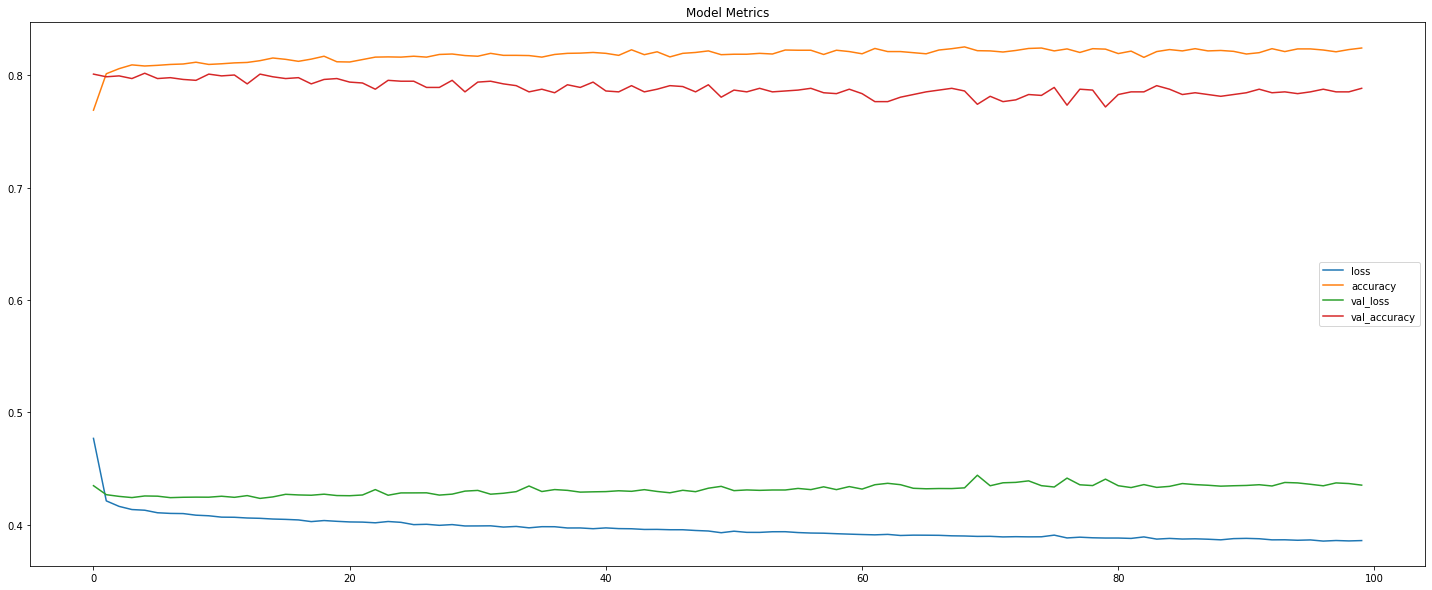

In [43]:
metrics.plot(figsize=(25, 10))
plt.title('Model Metrics')
plt.show()

In [44]:
print('------------------Training Set------------------')
print(classification_report(y_train, model.predict(X_train).round()))
print('------------------Validation Set------------------')
print(classification_report(y_val, model.predict(X_val).round()))

------------------Training Set------------------
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      3717
           1       0.72      0.55      0.63      1345

    accuracy                           0.82      5062
   macro avg       0.79      0.74      0.76      5062
weighted avg       0.82      0.82      0.82      5062

------------------Validation Set------------------
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       929
           1       0.63      0.48      0.55       337

    accuracy                           0.79      1266
   macro avg       0.73      0.69      0.71      1266
weighted avg       0.78      0.79      0.78      1266



### Model Analysis

Model ini menghasilkan akurasi yang cukup baik yaitu **0.82** pada training set dan **0.78** pada validation set. Namun, recall dari model ini rendah dalam memprediksi kelas 1, hal ini disebabkan karena adanya label imbalance pada dataset. Sedangkan dari grafik metric dapat diketahui model mengalami **overfitting** ini ditandai saat training loss dari model turun tetapi validation lossnya naik. 

## Model Improvement

Karena model pertama ngalami overfitting, maka pada bagian ini akan dilakukan tweak terhadap model agar menghasilkan loss dan akurasi yang lebih baik. Model akan di definisikan menggunakan metode **Sequential API**.

In [45]:
# Define the model
model = Sequential()
model.add(Dropout(0.3, input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=200, validation_data=val_dataset, verbose=0)

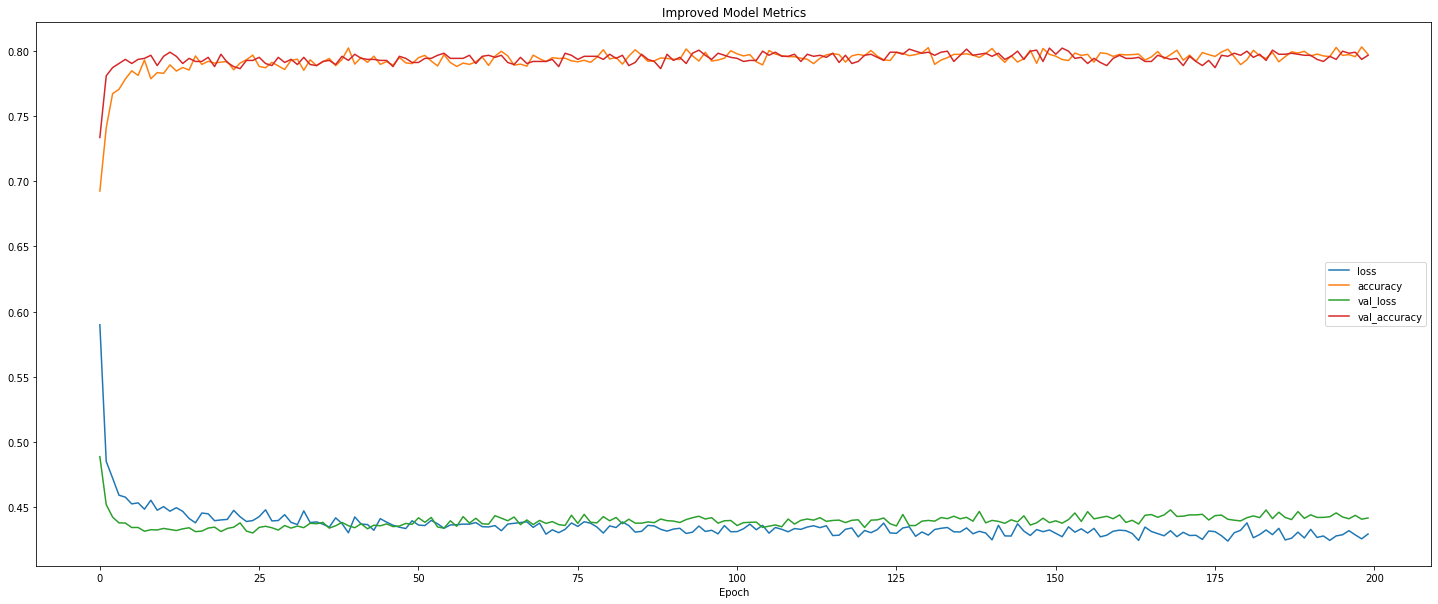

In [46]:
metrics = pd.DataFrame(history.history)
metrics.plot(figsize=(25, 10))
plt.title('Improved Model Metrics')
plt.xlabel('Epoch')
plt.show()

In [47]:
print('------------------Training Set------------------')
print(classification_report(y_train, model.predict(X_train).round()))
print('------------------Validation Set------------------')
print(classification_report(y_val, model.predict(X_val).round()))

------------------Training Set------------------
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      3717
           1       0.68      0.57      0.62      1345

    accuracy                           0.81      5062
   macro avg       0.77      0.74      0.75      5062
weighted avg       0.81      0.81      0.81      5062

------------------Validation Set------------------
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       929
           1       0.64      0.53      0.58       337

    accuracy                           0.80      1266
   macro avg       0.74      0.71      0.72      1266
weighted avg       0.79      0.80      0.79      1266



Setelah dilakukan peningkatan terhadap model dengan menambahkan **2 regularisasi Dropout** dengan **rate = 0.3**, menambahkan **1 hidden layer** dengan **10 neuron**, dan menambahkan epoch pada training model menjadi 200 epoch, model **tidak lagi mengalami overfitting** walaupun pada epoch 0 hingga sekitar epoch 30 model mengalami underfitting. Namun, secara keseluruhan model sudah baik dan menghasilkan akurasi sebasar **0.81** pada training set dan **0.80** pada validation set.

## Model Saving

Pada bagian ini model yang sudah dilakukan peningkatan akan disimpan sebagai `model.h5` dan akan menyimpan pipeline untuk melakukan preprocessing menggunakan **Pickle** sebagai `preprocessor.pkl`.

In [48]:
# Save the model
model.save('model.h5')

# Save preprocessing pipeline
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

## Model Testing (Data Inference)

Setelah model dilatih dan dievaluasi, sekarang model akan diuji menggunakan testing set (inference).

In [49]:
df_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4569,Female,No,No,No,22,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),48.80,1054.60,1
2099,Female,No,Yes,No,40,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),78.85,3126.85,0
6911,Female,No,Yes,Yes,57,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.10,1087.70,0
2329,Female,No,No,No,57,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,One year,No,Electronic check,94.70,5468.95,0
5157,Female,No,Yes,Yes,16,Yes,No,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Bank transfer (automatic),68.25,1114.85,0


### Prediction

In [50]:
# Split features and target
X_test = df_test.drop(['Churn'], axis=1) # Features
y_test = df_test['Churn'] # Target

# Transform the test set
X_test = preprocessor.transform(X_test)

# Predict the test set
y_pred = model.predict(X_test).round()

# Create dataframe
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten().astype(int)})
predictions.head(20)

,Actual,Predicted
4569,1,0
2099,0,0
6911,0,0
2329,0,0
5157,0,0
359,0,0
3590,0,0
1176,1,1
6366,0,0
3117,0,0


In [51]:
print('------------------Testing Set------------------')
print(classification_report(y_test, y_pred.round()))

------------------Testing Set------------------
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       517
           1       0.58      0.50      0.54       187

    accuracy                           0.77       704
   macro avg       0.71      0.69      0.69       704
weighted avg       0.76      0.77      0.77       704



## Conclusion

Kesimpulan yang dapat ditarik dari hasil EDA dan pemodelan menggunakan Artificial Neural Network (ANN) ini adalah:

Pada project ini dataset yang digunakan adalah data customer dari sebuah perusahaan layanan telephone untuk memprediksi apakah seorang customer akan churn atau tidak. Dari hasil **EDA** ada sekitar 27% atau 1869 customer yang churn atau berpindah ke layanan perusahaan lain, kebanyakan dari customer yang churn adalah customer-customer baru di perusahaan ini. Lalu diketahui juga bahwa customer yang tidak memiliki layanan internet hanya sekitar **7%** saja yang churn, sedangkan customer dengan persentase churn terbanyak adalah customer yang menggunakan layanan internet **fiber optic** dengan persentase churn sebesar **42%** dan ternyata untuk customer yang memiliki layanan internet tetapi tidak menggunakan layanan lain seperti Online Security, Online Backup, Device Protection, dan Tech Support sangat cederung untuk churn dibandingkan customer yang menggunakan layanan-layanan tersebut.

Kemudian untuk biaya bulanan, customer yang memiliki biaya bulanan tinggi cenderung untuk churn. Namun customer yang tidak churn memiliki total biaya yang lebih besar dibandingkan customer yang churn yaitu sebesar **$2,555**, hal ini mungkin karena customer-customer ini puas dengan layanan yang diberikan oleh perusahaan yang membuat mereka mau mengeluarkan uang lebih untuk layanan yang mereka gunakan.

Lalu dibuat model Artificial Neural Network yang tersusun dari:
- **Input layer** dengan **46 neuron**
- **1 hidden layer** dengan **16 neuron** dan menggunakan **ReLU** sebagai activation fuction
- **Output layer** dengan **1 neuron** dan menggunakan **Sigmoid** sebagai activation fuction karena pada kasus ini adalah binary classification

dicompile menggunakan optimizer **adam** dan **binary crossentropy** untuk loss functionnya. Setelah dilakukan training model ini mengalami **overfitting** dimana ketika loss dari training setnya mencoba untuk turun tetapi loss dari validation setnya naik. Oleh karena itu dibuat model baru dengan susunan sebagai berikut:
- **Input layer** dengan **46 neuron** dan regularisasi **Dropout** dengan rate = 0.3
- **2 hidden layer** dimana terdapat **16 neuron** dan **10 neuron**
- **Output layer** dengan **1 neuron** 

Model ini dicompile menggunakan optimizer **nadam** dan setelah dilakukan training pada model kedua, model ini menghasilkan loss dan akurasi yang lebih baik dari model pertama. Maka model kedua akan disimpan dan akan digunakan untuk memprediksi pada halaman deployment.

**NOTE**: Karena dataset yang digunakan pada project ini jumlahnya sedikit maka model menghasilkan akurasi yang tidak konsisten